# <div style="text-align:center"> <span style="font-family:Courier;"> IA Notebook # 4 - Red neuronal desde 0 </span></div>
## <div style="text-align:center"> <span style="font-family:Courier;"> DOTCSV </span> </div>

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles 

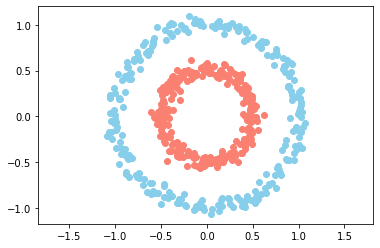

In [44]:
# Creando el dataset

n = 500
p = 2 # Caracteristicas sobre cada uno de los registros

X, Y = make_circles(n_samples= n, factor= 0.5, noise= 0.05) # factor = distancia entre los circulos

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c= 'skyblue')
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c= 'salmon')
plt.axis('equal')
plt.show()

In [0]:
# clase capa de la red

class neural_layer():

  def __init__(self, n_conn, n_neur, act_f): # número de conexiones, número de neuronas, función de activación
    
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur) * 2 - 1 # de -1 a 1
    self.w = np.random.rand(n_conn, n_neur) * 2 - 1    

In [0]:
# funciones de activación

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * ( 1 - x)) 

relu = lambda x: np.maximum(0, x)

In [0]:
def create_nn(topology, act_f):

  nn = []

  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l + 1], act_f))

  return nn

In [0]:
topology = [p, 4, 8, 1]

l2_cost = (lambda Yp, Yr: np.mean((Yr-Yp) ** 2),
           lambda Yp, Yr: (Yp - Yr)) 

def train(neural_net, X, Y, l2_cost, lr= 0.5, train= True):

  out = [(None, X)]

  # Forward pass
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].w + neural_net[l].b
    a = neural_net[l].act_f[0](z)
    out.append((z, a))

  if train:

    #Backward pass
    deltas = []

    for l in reversed(range(0, len(neural_net))):

      z = out[l + 1][0]
      a = out[l + 1][1]

      if l == len(neural_net) - 1:
        #Ultima capa
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        #Calcular capa respecto a la capa previa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].w

      #Gradient descent
      neural_net[l].b -= np.mean(deltas[0], axis= 0, keepdims= True) * lr     
      neural_net[l].w -= out[l][1].T @ deltas[0] * lr  

  return out[-1][1]

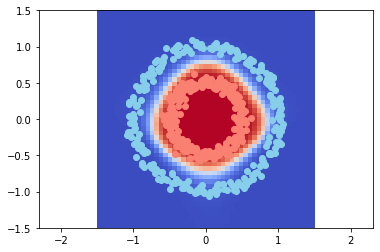

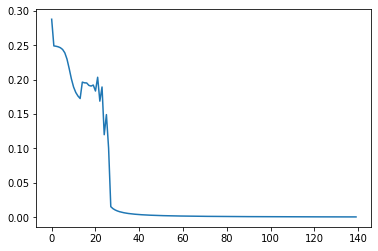

In [63]:
import time
from IPython.display import clear_output

neural_net = create_nn(topology, sigm)
loss = []

for i in range(3500):

  pY = train(neural_net, X, Y, l2_cost, lr = 0.02)

  if i % 25 == 0: 

    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0][i1] = train(neural_net, np.array([x0, x1]), Y, l2_cost, train = False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap = 'coolwarm')
    plt.axis('equal')

    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c= 'skyblue')
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c= 'salmon')
    
    clear_output(wait = True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.3)
